# Time Series Data Type

In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-resu

In [65]:
from datetime import datetime
from dateutil import parser
import pandas as pd
import numpy as np
date1 = datetime(year=2020, month=5, day=3, hour=10)
date2 = parser.parse("2021 3rd June")
date2.strftime("%A")

'Thursday'

Typed arrays of times: Numpy's `datetime64` datatype
1. `datetime64` has many fundamental units, from years to attoseconds. However, since it has 64 bits to encode these fundamental units, choose them wisely. Typical use cases: nanosecond can span at least 300 years, and is sufficient
2. `np.datetime64` allows us to combine the friendly use of `datetime` and `dateutil`, as well as the efficient storage and vectorised operations of `numpy` with `pd.to_datetime()` and `pd.to_timedelta()` 

In [14]:
date = np.array('2021-03-01', dtype=np.datetime64)
print(date)
date + np.arange(12)

2021-03-01


array(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
       '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
       '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12'],
      dtype='datetime64[D]')

In [15]:
# Force the fundamental unit. Else 'ns' by default
np.datetime64('2021-05-01 12:01:59.20', 'ns')

numpy.datetime64('2021-05-01T12:01:59.200000000')

In [22]:
date = pd.to_datetime("4th of June, 2021")
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07',
               '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15'],
              dtype='datetime64[ns]', freq=None)

Pandas Time Series: Indexing by Time
1. With `DatetimeIndex`, we can use `Series` or `DataFrame`'s indexing patterns to grab data. Pandas understand datetime and knows whether a datetime is within the specified range (but it will not sort in the output)

In [24]:
index = pd.DatetimeIndex(['2014-08-04', '2014-07-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-08-04    0
2014-07-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [28]:
print(data['2014-08-04':'2015-07-04'])
print(data['2014'])

2014-08-04    0
2015-07-04    2
dtype: int64
2014-08-04    0
2014-07-04    1
dtype: int64


Pandas Time Series Data Structure

Time Series Form | Pandas Type | data type is based on | To improve | Index Structure
---|---|---|---|---
time stamps (a point in time) | `Timestamp` | `np.datetime64` | `datetime.datetime` | `DatetimeIndex`
Period (**that** interval of time) | `Period` | fixed-frequency interval of `np.datetime64` | | `PeriodIndex`
time delta (duration) | `Timedelta` | `np.timedelta` | `datetime.timedelta` | `TimedeltaIndex`
  
1. `pd.to_datetime()` yields
- a timestamp: when only one datetime is passed
- a `DatetimeIndex`: when a **list** is passed
  
2. `range`, `np.arange`, `np.date_range`, `np.period_range`, `np.timedelta_range`
- similarly, we can specify start, end, but also step (`freq`) and number of points (`periods`)

In [36]:
# 1. Convert dates of various formats to DatetimeIndex
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
print(dates)

# 2. Convert DatetimeIndex to PeriodIndex
print(dates.to_period('D')) # that means break down by day

# 3. Convert PeriodIndex to TimedeltaIndex
print(dates - dates[0])

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)
PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')
TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)


In [40]:
pd.date_range('2015-07-03', periods=8, freq = 'H')
pd.period_range('2015-07', periods=8, freq = 'M')
pd.timedelta_range(0, periods = 10, freq = 'H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [60]:
# Take November as the start of a quarter, jump every 2 quarter. Return me the start of the quarter instead of the end (due to 'S')
pd.date_range('2015-07-03', periods=8, freq = '2QS-NOV')

# Jump every 2 days 3 hours. Other types could be A (year), W (week)
pd.period_range('2021-01', periods = 3, freq = '2D3H')

DatetimeIndex(['2015-08-01', '2016-02-01', '2016-08-01', '2017-02-01',
               '2017-08-01', '2018-02-01', '2018-08-01', '2019-02-01'],
              dtype='datetime64[ns]', freq='2QS-NOV')

PeriodIndex(['2021-01-01 00:00', '2021-01-03 03:00', '2021-01-05 06:00'], dtype='period[51H]', freq='51H')

# Resampling, Shifting and Windowing
## Resampling and Converting Frequencies  
1. For down-sampling,
- `resample()` is fundamentally data aggregation
- `asfreq()` is fundamentally data selection  
2. However, for up-sampling instead, both perform similarly. Specify `method`
- Forward fill
- Backward fill

In [66]:
%matplotlib inline
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
sb.set()
goog = data.DataReader('GOOG', start = '2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


<AxesSubplot:xlabel='Date'>

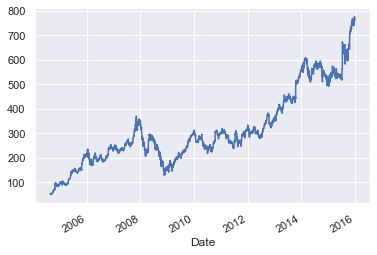

In [67]:
goog = goog['Close']
goog.plot()

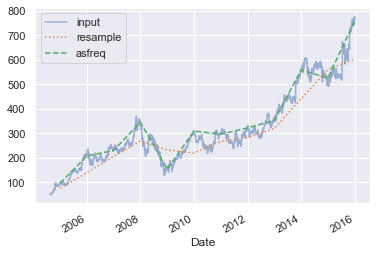

In [68]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')  # how to downsample with resample()
goog.asfreq('BA').plot(style='--')  # how to downsample with asfreq()
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

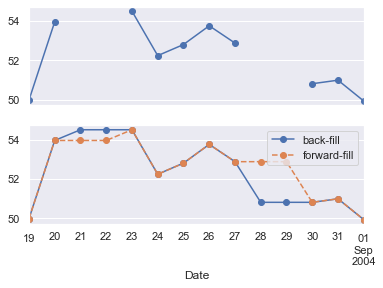

In [11]:
f, axes = plt.subplots(2, sharex = True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=axes[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=axes[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=axes[1], style='--o')
axes[1].legend(['back-fill', 'forward-fill'], loc='upper right')

## Shifting (specify in multiples of the frequency): 
1. `shift()` shifts the data
2. `tshift()` shifts the index (deprecated)

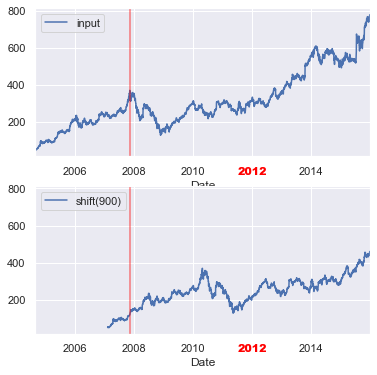

In [36]:
f, axes = plt.subplots(2, sharey = True, figsize=(6,6))
goog = goog.asfreq('D', method = 'pad')
offset = pd.Timedelta(900, freq='D')

goog.plot(ax = axes[0])
goog.shift(900).plot(ax = axes[1])

local_max = pd.to_datetime('2007-11-05')
axes[0].axvline(local_max, alpha = 0.5, color = 'red')
axes[0].legend(['input'], loc=2)
axes[0].get_xticklabels()[4].set(weight='heavy', color='red')

axes[1].axvline(local_max + offset, alpha = 0.5, color = 'red')
axes[1].legend(['shift(900)'], loc = 2)
axes[1].get_xticklabels()[4].set(weight='heavy', color = 'red')

Text(0, 0.5, '% Return on Investment')

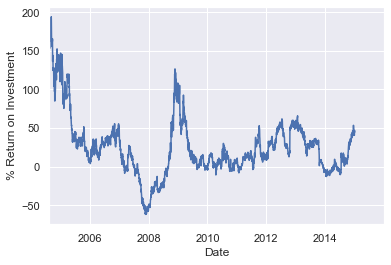

In [38]:
ROI = 100 * (goog.shift(-365)/goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

## Rolling Windows: Moving averages!

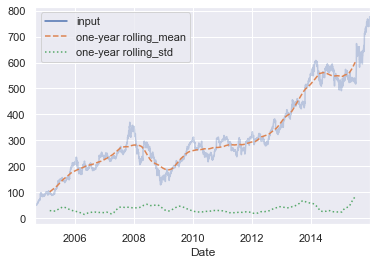

In [40]:
rolling = goog.rolling(365, center = True)
data = pd.DataFrame({'input': goog, 'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

# Mock Test: Visualising Seattle Bicycle Counts

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()

In [42]:
data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [44]:
# Clean data: shorten column names and add 'Total' column
data.columns = ['Total', 'East', 'West']
data.dropna().describe()

,Total,East,West
count,141400.000000,141400.00000,141400.000000
mean,111.169434,50.61628,60.553154
std,141.999671,65.46336,88.279627
min,0.000000,0.00000,0.000000
25%,14.000000,6.00000,7.000000
50%,60.000000,28.00000,30.000000
75%,145.000000,68.00000,74.000000
max,1097.000000,698.00000,850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

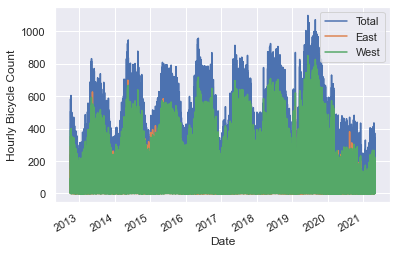

In [46]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly bicycle count')

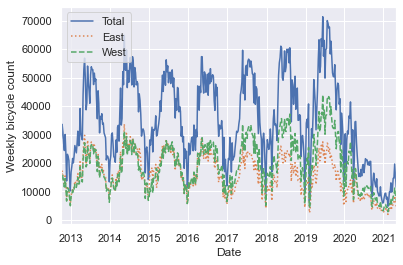

In [49]:
# Hourly samples are too dense. So resample data by week
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean hourly count')

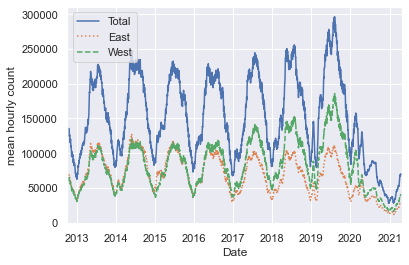

In [50]:
# 30-day rolling mean
daily = data.resample('D').sum()
daily.rolling(30, center = True).sum().plot(style=['-', ':', '--'])
plt.ylabel('mean hourly count')

<AxesSubplot:xlabel='Date'>

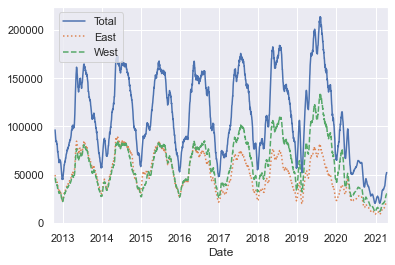

In [51]:
# Due to hard cutoff of window, curves are jagged. Smooth it with window function
daily.rolling(30, center = True, win_type = 'gaussian').sum(std = 10).plot(style=['-', ':', '--'])

<AxesSubplot:xlabel='time'>

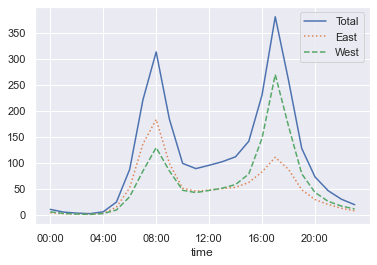

In [53]:
# Average traffic as f(time of the day)
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks = hourly_ticks, style=['-', ':', '--'])

<AxesSubplot:>

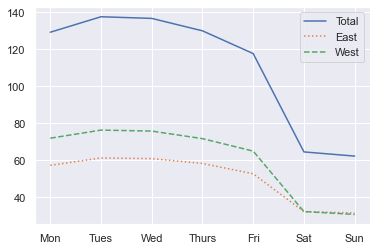

In [54]:
# Average traffic on the day of week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', ':', '--'])

<AxesSubplot:title={'center':'Weekend'}, xlabel='time'>

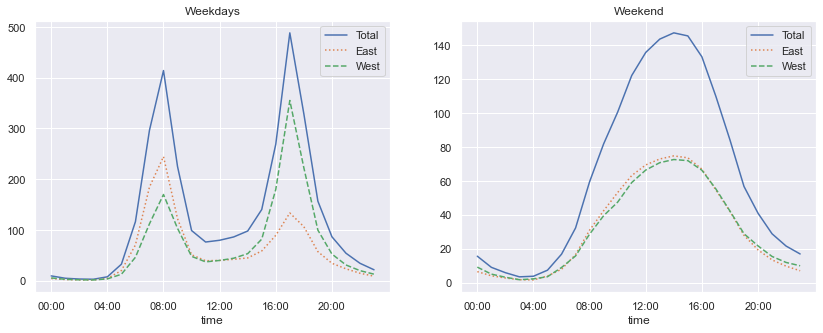

In [63]:
# Explore the hourly trend on weekdays vs weekends
weekend = np.where(data.index.dayofweek < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
f, axes = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax = axes[0], title = 'Weekdays', xticks = hourly_ticks, style=['-', ':', '--'])
by_time.loc['Weekend'].plot(ax = axes[1], title = 'Weekend', xticks = hourly_ticks, style=['-', ':', '--'])